# ITV Live Online Career Challenge

#### Challenge info -
How do ITV promote content on their new streaming platform ITVX
effectively to their viewers? <br><br>
Overview:<br>
ITV have just launched their new streaming platform ITVX and have commissioned new
shows by partnering with third parties such as Warner brothers to expand the breadth of
ITVX content and the number of hours available to watch (from 3,000 to 15,000!).<br><br>
Step Up Challenge: <br>
With an average of 30 million registered users, how can we ensure that they discover this
new great content, increase the number of hours they stay on the platform and are aware
of the new features that ITVX has to offer?<br><br>
Task :<br>
ITVX is launching a new original show every week, ‘A Spy Among Friends’ is one of the first
original shows on ITVX in 2022<br>
* Task 1 - Data Strategy<br>
  We want to know what the customer base viewing habits look like?<br><br>
* Task 2 - Data Science<br>
   Who should we be promoting this show to?<br><br>
* Based on what you have learnt, what recommendations would you give to product
and /or marketing to promote ‘Spy Amongst Friends’.

## Libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# exploratory data analysis with Pandas Profiling
from ydata_profiling import ProfileReport

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## TASK 2 - DATA SCIENCE

For the data science task, we are looking into the **"DIG_step_up_user_data.csv"** file and the column *"any_spy_among_friends_consumption"*. We'll start off by,<br>
* Reading in the file and sniff testing the data,
* Perform data cleaning as a part of the data pre-processing stage,

### Acquire the data

In [3]:
# read in the files using pandas
df_user_data = pd.read_csv('DIG_step_up_user_data.csv')
df_user_data.head()          # display the first 5 rows of the file

,user_id,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
0,#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,...,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,True,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other
1,+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,...,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,True,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female
2,+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,...,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
3,+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,...,78485.442042,0.000000,0.000000,2.0,0.000000,78485.442042,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",36.0,Prefer not to answer
4,+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,17670.600000,11802.851738,144107.089606,...,NaN,0.000000,0.000000,1.0,70648.591664,176989.167344,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,NaN


In [9]:
# shape of the file
df_user_data.shape

(1771, 31)

In [4]:
# print the file info
df_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   user_id                                        1771 non-null   object 
 1   n_sessions                                     1771 non-null   int64  
 2   n_programmes_watched                           1771 non-null   int64  
 3   n_episodes_watched                             1771 non-null   int64  
 4   top_3_programmes                               1771 non-null   object 
 5   top_3_genres                                   1745 non-null   object 
 6   total_genre_comedy_consumption_seconds         1771 non-null   float64
 7   total_genre_drama_consumption_seconds          1771 non-null   float64
 8   total_genre_entertainment_consumption_seconds  1771 non-null   float64
 9   total_genre_sport_consumption_seconds          1771 

In [8]:
# get the list of column headers
headers = df_user_data.columns.values
print('The list of columns in the file are :\n', headers)

The list of columns in the file are :
 ['user_id' 'n_sessions' 'n_programmes_watched' 'n_episodes_watched'
 'top_3_programmes' 'top_3_genres'
 'total_genre_comedy_consumption_seconds'
 'total_genre_drama_consumption_seconds'
 'total_genre_entertainment_consumption_seconds'
 'total_genre_sport_consumption_seconds'
 'total_genre_other_consumption_seconds'
 'total_genre_factual_consumption_seconds'
 'total_channel_ITV_consumption_seconds'
 'total_channel_ITV2_consumption_seconds'
 'total_channel_ITV3_consumption_seconds'
 'total_channel_ITVBe_consumption_seconds'
 'total_channel_ITV4_consumption_seconds'
 'total_watch_morning_consumption_seconds'
 'total_watch_afternoon_consumption_seconds'
 'total_watch_dinner_consumption_seconds'
 'total_watch_night_consumption_seconds'
 'total_platform_tv_consumption_seconds'
 'total_platform_mobile_consumption_seconds'
 'total_platform_desktop_consumption_seconds' 'n_devices_watched_on'
 'total_weekend_consumption_seconds' 'total_consumption_seconds'


### Data cleaning

Before we can analyze the data further, lets clean the data starting by answering some questions but before that lets create a copy of the dataframe so that we dont end up editing the original dataframe.

In [10]:
# create a copy of the dataframe
df_user_data_copy = df_user_data.copy()

**Q1) Are there columns with incorrect data types?** <br>
From the file info, we could see that there are columns with incorrect data types.


Let's start with the **Age** column, convert the column to integer type.

**Q1) Are there empty cells or blank values for columns in the file?**

In [11]:
# check for missing values in the file
df_user_data_copy.isnull().sum()

user_id                                            0
n_sessions                                         0
n_programmes_watched                               0
n_episodes_watched                                 0
top_3_programmes                                   0
top_3_genres                                      26
total_genre_comedy_consumption_seconds             0
total_genre_drama_consumption_seconds              0
total_genre_entertainment_consumption_seconds      0
total_genre_sport_consumption_seconds              0
total_genre_other_consumption_seconds              0
total_genre_factual_consumption_seconds            0
total_channel_ITV_consumption_seconds              0
total_channel_ITV2_consumption_seconds             0
total_channel_ITV3_consumption_seconds             0
total_channel_ITVBe_consumption_seconds            0
total_channel_ITV4_consumption_seconds             0
total_watch_morning_consumption_seconds            0
total_watch_afternoon_consumption_seconds     

We can see that there are columns in the file containing null or blank values. Let's visualise this to have a better look at all the columns with empty cells.

<AxesSubplot: >

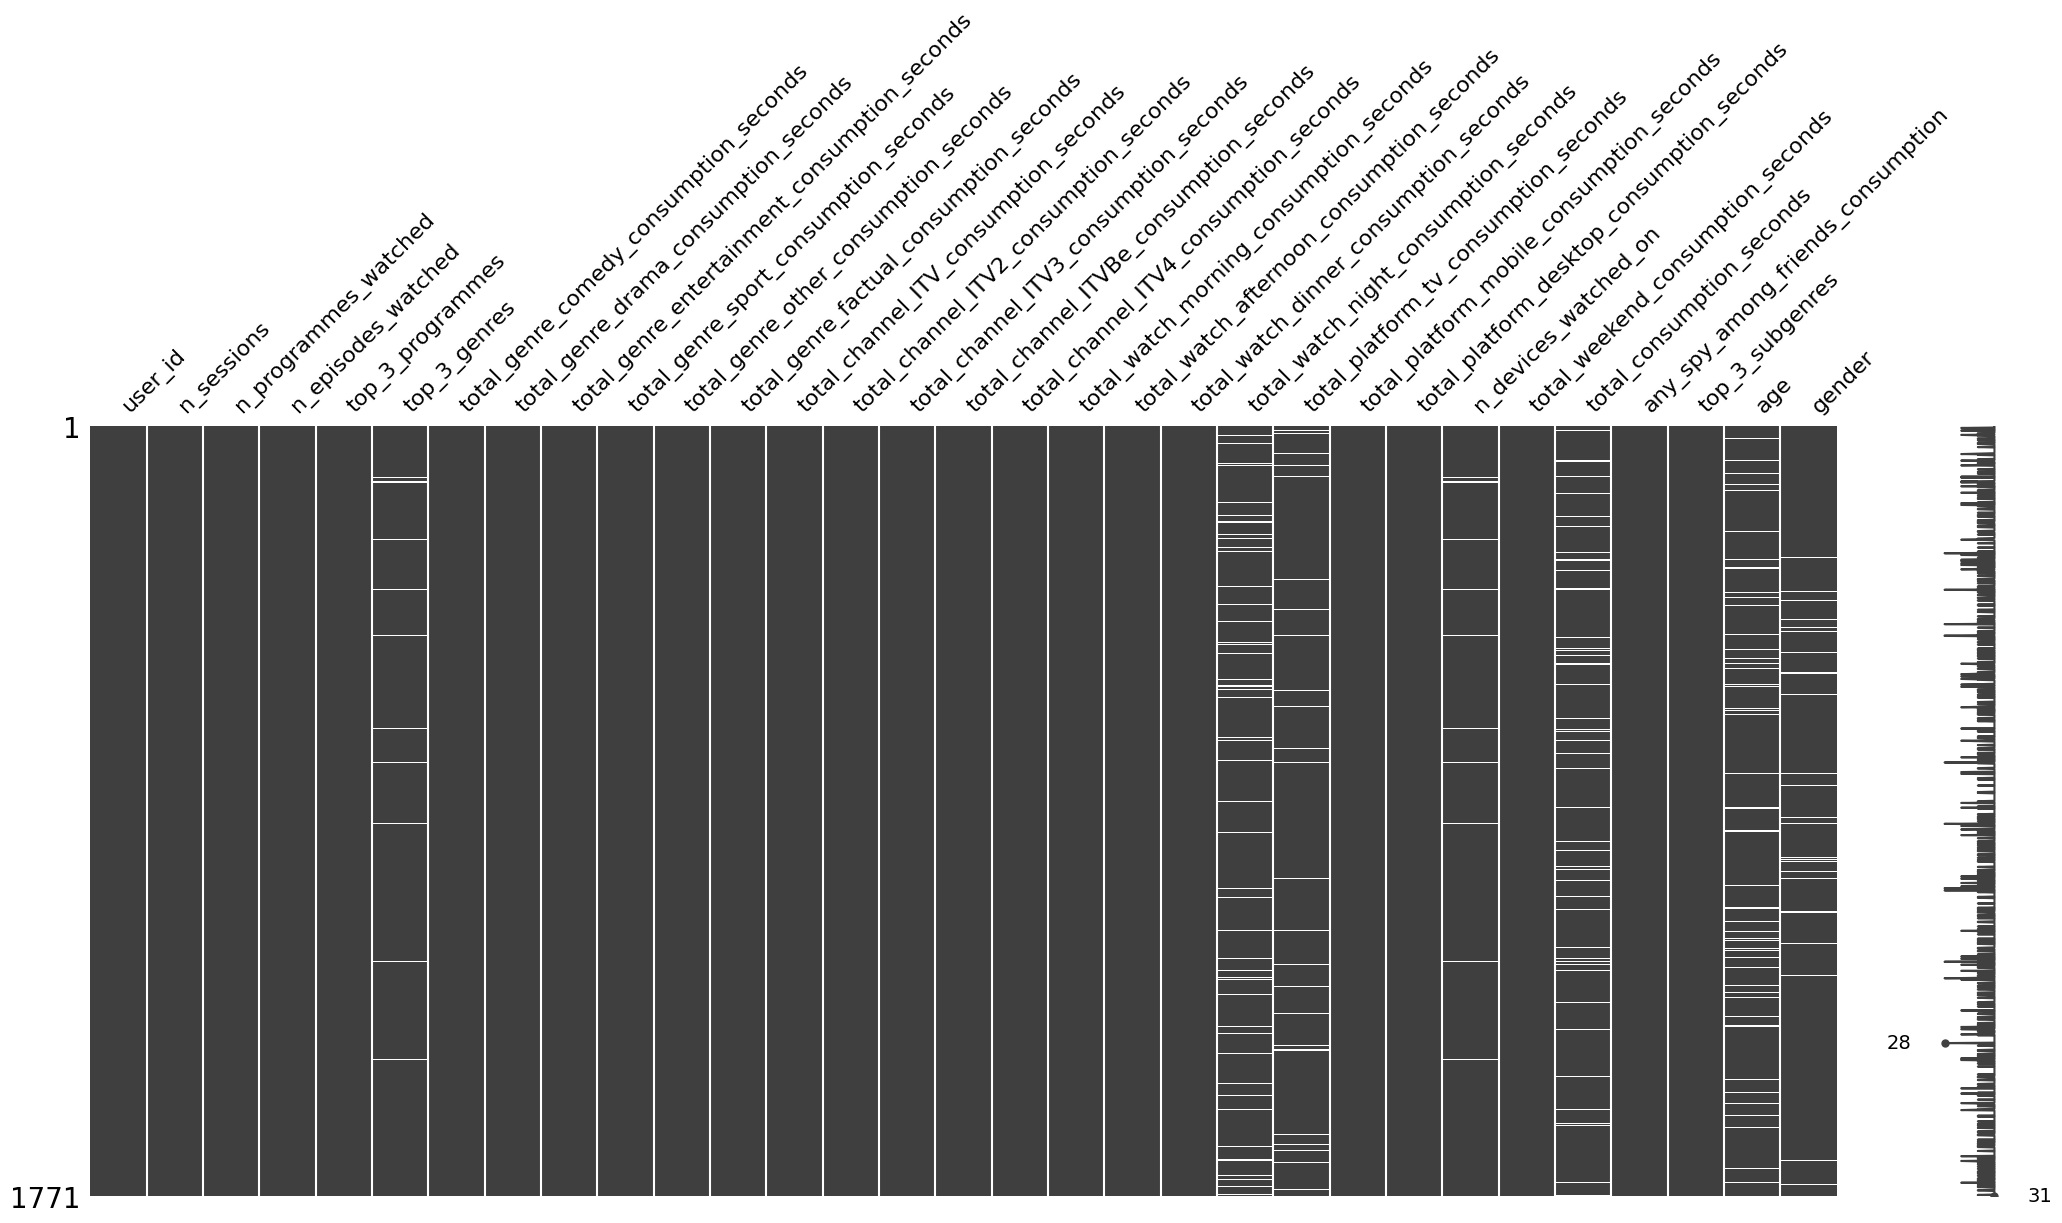

In [12]:
# missingno library allows us to check and visualise these missing values
msn.matrix(df_user_data_copy)

Text(0.5, 1.0, 'Columns with empty or blank cells')

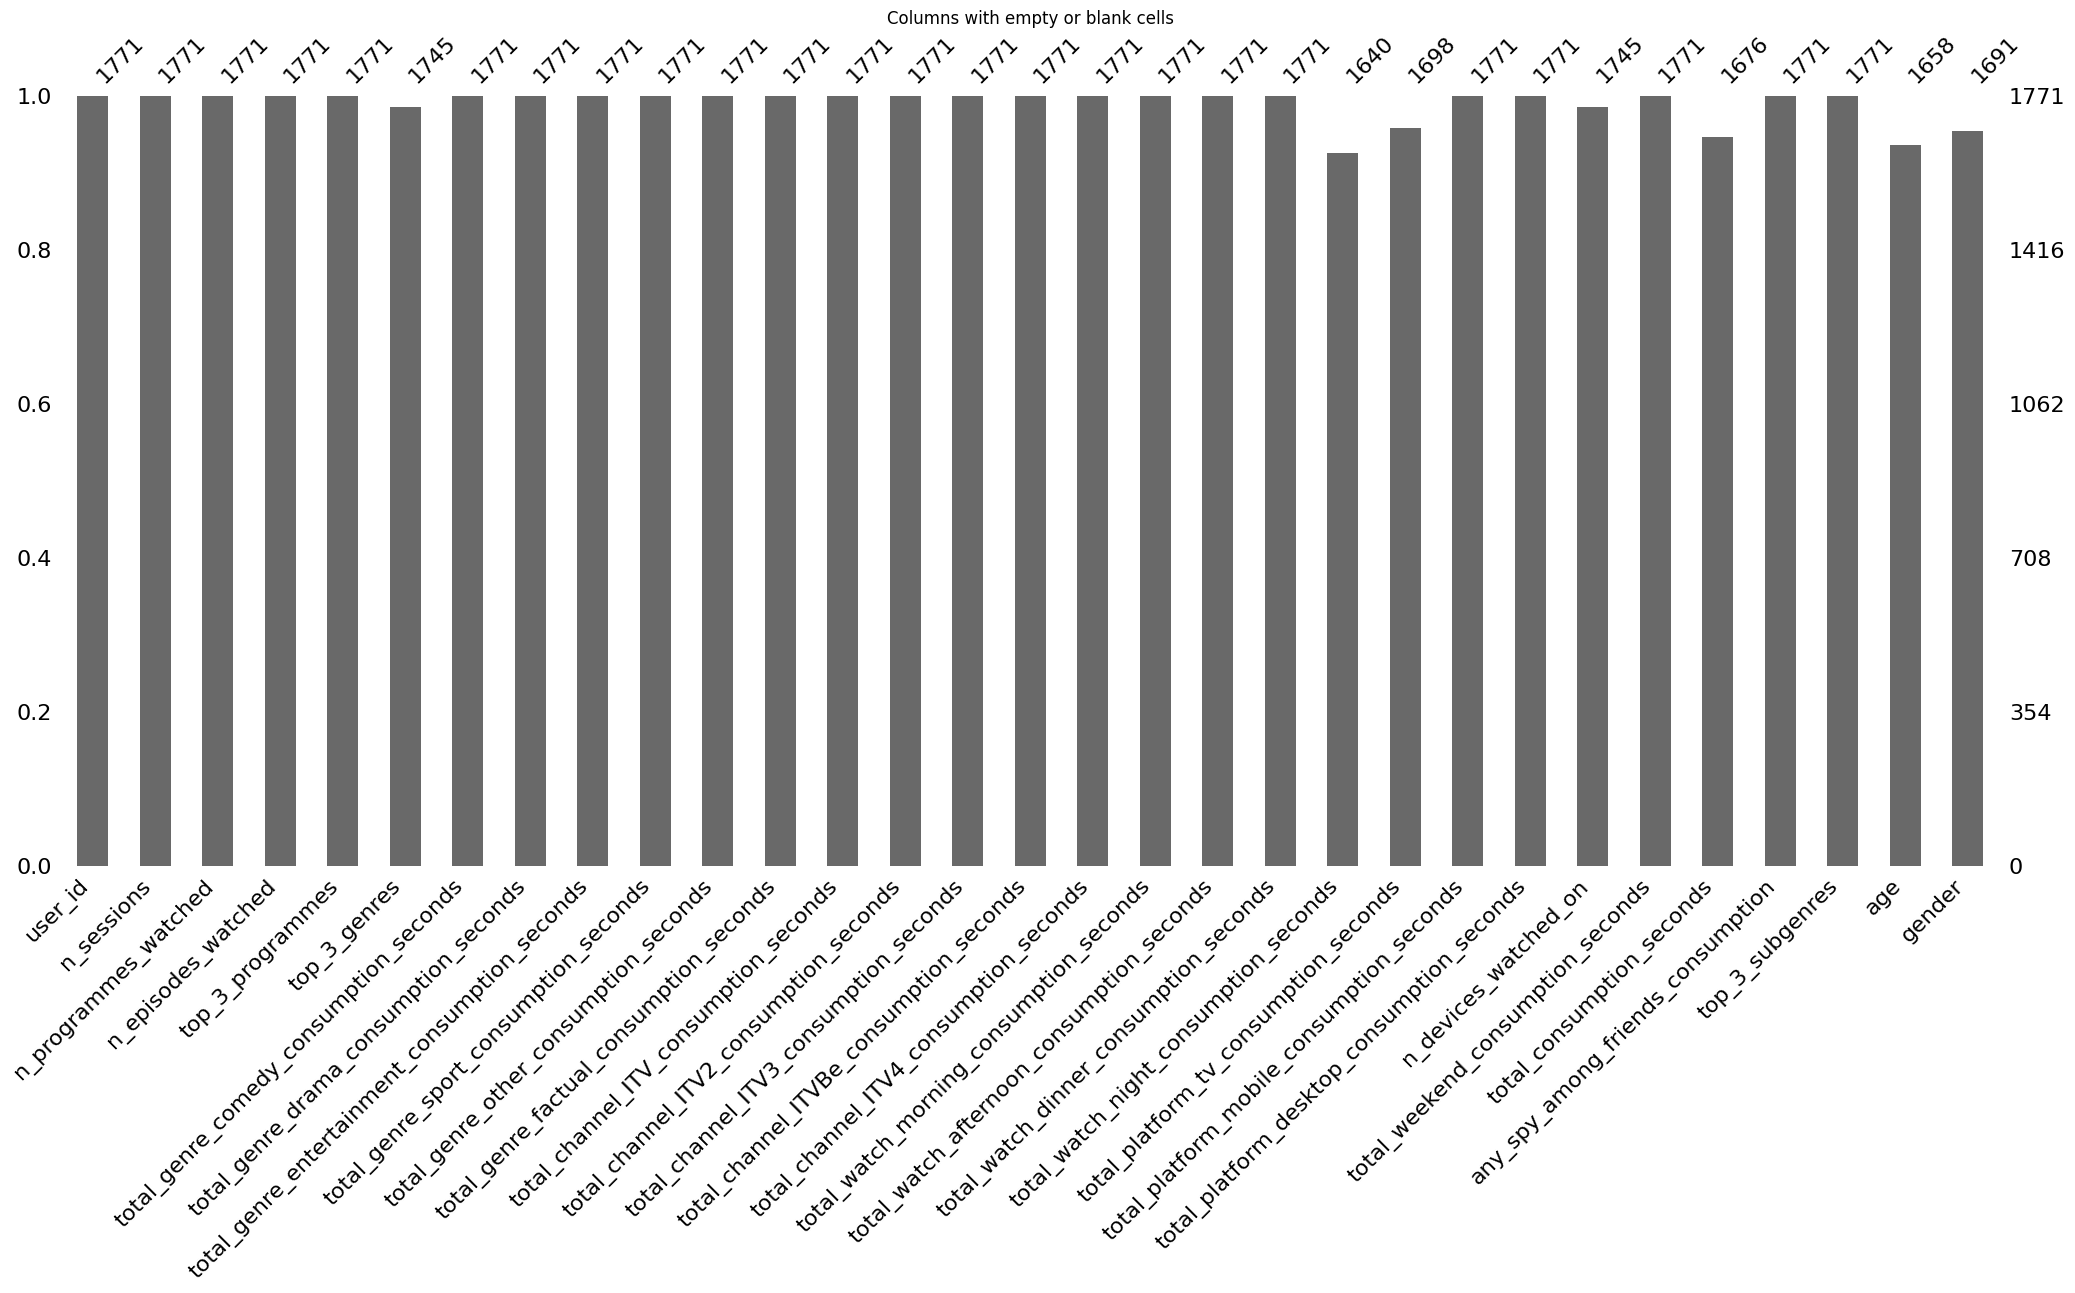

In [22]:
# lets plot a bar chart to visualise the exact count of missing data
msn.bar(df_user_data_copy)
plt.title('Columns with empty or blank cells')

Here, we can see that the following columns have empty cell values,<br>
* top_3_genres
* total_watch_night_consumption_seconds
* total_platform_tv_consumption_seconds
* n_devices_watched_on
* total_consumption_seconds
* age
* gender

Lets try to see what we can do these columns one by one.

**Column - top_3_genres**

In [44]:
# lets check the records with empty values in this column
df_user_data_copy_top_3_genres = df_user_data_copy[df_user_data_copy['top_3_genres'].isnull()]
df_user_data_copy_top_3_genres

,user_id,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
118,34qq/LCqiErVpuyEDFyPCEPZXADC6GId0qMz3pMKXxA=,80,8,48,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...",NaN,0.000,49654.812000,59980.330000,15006.436342,...,124641.578342,0.000000,0.000000,NaN,22137.977051,124641.578342,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
127,3dgSJIH2S9EWaAWspEQjzFNEXitcaHPBJev/Rwznlbk=,7,2,3,"['THE SUSPECT', 'A SPY AMONG FRIENDS']",NaN,0.000,5986.245000,0.000000,0.000000,...,5986.245000,0.000000,0.000000,NaN,5518.333000,5986.245000,True,['CRIME AND THRILLER'],40.0,Male
129,3h10Tx5p163QrA1YscQPVZdHIwrpqVhLa862C8euIec=,21,10,16,"['THE VOICE', 'A SPY AMONG FRIENDS', 'DOC MART...",NaN,0.000,24543.208000,15072.229451,0.000000,...,40144.868555,0.000000,0.000000,NaN,12131.267298,40144.868555,True,"['FAMILY', 'TALENT SHOWS', 'COMEDY']",40.0,Male
177,5g7WtW+iPUyZjTAqql4Kf7okijsBjqLroOgSsT7h+h4=,24,3,13,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'THE W...",NaN,0.000,22195.715000,0.000000,0.000000,...,22195.715000,0.000000,0.000000,NaN,11110.211000,22195.715000,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",39.0,Female
261,8BKNX3fvY+zCTXu7yLR65HVOcEshYaU/GjvRcwhad0o=,2,1,1,['SNOOKER: CHAMPION OF CHAMPIONS'],NaN,0.000,0.000000,0.000000,4476.583000,...,4476.583000,0.000000,0.000000,NaN,0.000000,4476.583000,False,"['EVENT', 'SNOOKER']",35.0,Male
296,9dHIFQkHMZ8izvhAC3QQeSkO2BCp2Rry00UmmMpzU84=,20,5,18,"['CATCHPHRASE', 'WORLD CUP', 'A SPY AMONG FRIE...",NaN,0.000,4470.305000,23878.824000,7489.603779,...,35838.732779,0.000000,0.000000,NaN,7389.373671,35838.732779,True,"['QUIZ AND GAME SHOWS', 'FOOTBALL', 'EVENT']",31.0,Female
376,Cu1QB+B9jtRtzIZ9Dy2KLqib6g7cT7UXCjnip39g38E=,5,3,3,"['THIS HAPPY BREED', 'WORLD CUP', 'THIS MORNING']",NaN,0.000,0.000000,3230.999190,6023.768642,...,1339.491000,0.000000,10982.263832,NaN,9090.755642,NaN,False,"['SOCIAL REALISM', 'COMEDY', 'FOOTBALL']",31.0,Male
455,FlSztVOfjoR+cIxKZPk4ULree+SApJQSMHEj+6W39E0=,91,17,50,"['ANY HUMAN HEART', 'A CONFESSION', 'RECKLESS']",NaN,0.000,126049.945032,317.205000,0.000000,...,126661.635032,0.000000,0.000000,NaN,26801.963000,126661.635032,True,"['CRIME AND THRILLER', 'SOCIAL DRAMA', 'BASED ...",32.0,Male
481,GpOjr61arLAL+9pKwVFm+G2aUo2PEIMLFuBGbb0/l2g=,28,3,10,"['WORLD CUP', 'A SPY AMONG FRIENDS', 'WITHOUT ...",NaN,0.000,20931.236000,0.000000,4845.488149,...,NaN,0.000000,0.000000,NaN,2762.363000,25776.724149,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,Female
482,GtqrYNRq6iwCA4cTq+vBaC4mfJMNb88kyeK7O/a/HG8=,5,1,4,"['GORDON, GINO & FRED: ROAD TRIP']",NaN,0.000,0.000000,8900.259000,0.000000,...,8900.259000,0.000000,0.000000,NaN,3293.389000,NaN,False,"['FACTUAL', 'TRAVEL', ' ADVENTURE AND EXPLORAT...",28.0,Male


So there are 26 records with empty cell value in this column. Let's see if there are users in these records who watch our target show **A spy Among Friends**

In [40]:
# check the record with empty values in these columns and they watch our target show
df_user_data_copy[(df_user_data_copy['top_3_genres'].isnull()) & (df_user_data_copy['any_spy_among_friends_consumption'] == 1)].shape

(15, 31)

Since, there are 15 out out the 26 records who watch our target show, lets try to fill the values by checking their consumption time for each genre. The top 3 genres with most consumption in seconds can be taken as the user's top 3 genres.

In [56]:
genre_col_list = df_user_data_copy['top_3_genres'].values
genre_col_list

array(["['DRAMA', 'FACTUAL', 'SPORT']", "['DRAMA']",
       "['ENTERTAINMENT', 'SPORT', 'DRAMA']", ...,
       "['ENTERTAINMENT', 'DRAMA', 'SPORT']",
       "['SPORT', 'ENTERTAINMENT', 'COMEDY']", "['ENTERTAINMENT']"],
      dtype=object)

In [72]:
x = df_user_data_copy.copy()
df_x = x[x['top_3_genres'].isnull()]
df_x = df_x.dropna()
df_x

,user_id,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,...,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender


In [73]:
x['top_3_genres'].isnull().sum()

26

In [87]:
x = [2, 3, 3, 4, 3, 5]
for i, item in enumerate(x):
    if item == 3:
        x[i] = 10
type(x)

list

In [ ]:
# function to generate top 3 genres based on consumption time
def top_3_genre_picker(i):

    consumption_col_list = []
    row = df_user_data_copy.iloc[i][genres_consumption_cols]
    for item in row:

In [101]:
x = df_user_data_copy.iloc[1556][genres_consumption_cols]
for i in x:
    print(i)

0.0
0.0
0.0
0.0
210.79
0.0


In [ ]:
# genres consumption columns list
genres_consumption_cols = [col for col in df_user_data_copy.columns.values if 'total_genre' in col]
col_position 
# iterate through the df_user_data_copy_top_3_genres dataframe and sort the consumption values for all the genres and select the top 3 genres from that list
for i, item in enumerate(genre_col_list):
    if item == np.nan:
        genre_col_list[i] = top_3_genre_picker()

In [86]:
genres_consumption_cols

['total_genre_comedy_consumption_seconds',
 'total_genre_drama_consumption_seconds',
 'total_genre_entertainment_consumption_seconds',
 'total_genre_sport_consumption_seconds',
 'total_genre_other_consumption_seconds',
 'total_genre_factual_consumption_seconds']

In [39]:
# check the top_3_genres unique values
df_user_data_copy['top_3_genres'].unique()

array(["['DRAMA', 'FACTUAL', 'SPORT']", "['DRAMA']",
       "['ENTERTAINMENT', 'SPORT', 'DRAMA']",
       "['DRAMA', 'ENTERTAINMENT', 'OTHER']",
       "['SPORT', 'ENTERTAINMENT', 'DRAMA']",
       "['DRAMA', 'OTHER', 'FACTUAL']", "['DRAMA', 'FACTUAL']",
       "['DRAMA', 'OTHER']", "['DRAMA', 'ENTERTAINMENT']",
       "['DRAMA', 'OTHER', 'ENTERTAINMENT']", "['OTHER', 'DRAMA']",
       "['ENTERTAINMENT', 'DRAMA', 'OTHER']", "['DRAMA', 'SPORT']",
       "['DRAMA', 'COMEDY', 'ENTERTAINMENT']", "['ENTERTAINMENT']",
       "['FACTUAL', 'OTHER']", "['DRAMA', 'SPORT', 'ENTERTAINMENT']",
       "['DRAMA', 'ENTERTAINMENT', 'SPORT']",
       "['ENTERTAINMENT', 'FACTUAL', 'DRAMA']",
       "['SPORT', 'ENTERTAINMENT', 'OTHER']",
       "['ENTERTAINMENT', 'DRAMA', 'FACTUAL']",
       "['DRAMA', 'ENTERTAINMENT', 'FACTUAL']",
       "['ENTERTAINMENT', 'DRAMA', 'SPORT']",
       "['DRAMA', 'ENTERTAINMENT', 'COMEDY']",
       "['SPORT', 'ENTERTAINMENT']", "['ENTERTAINMENT', 'DRAMA']",
       "['DRAMA'

In [34]:
df_user_data_copy['top_3_programmes'].unique()

array(["['WORLD CUP', 'CORONATION STREET', 'THE MOTORBIKE SHOW']",
       "['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",
       '[\'WORLD CUP\', "I\'M A CELEBRITY... GET ME OUT OF HERE!", \'LOVE ISLAND\']',
       ...,
       "['A CONFESSION', 'A SPY AMONG FRIENDS', 'CENTRAL INTELLIGENCE']",
       '["I\'M A CELEBRITY... GET ME OUT OF HERE!", \'CORONATION STREET\', \'THE MASKED SINGER\']',
       "['LOVE ISLAND: AUSTRALIA', 'THE ONLY WAY IS ESSEX', 'EKINSU & DAVIDE: HOMECOMINGS']"],
      dtype=object)

In [30]:
corr = df_user_data_copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,n_sessions,n_programmes_watched,n_episodes_watched,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,age
n_sessions,1.000000,0.702575,0.909351,0.105531,0.786707,0.537532,0.245199,0.363938,0.309680,0.794746,0.196855,0.531411,0.169560,0.233773,0.627003,0.704789,0.758576,0.630376,0.876122,0.096011,0.035198,0.139375,0.803761,0.873566,0.274732,-0.000474
n_programmes_watched,0.702575,1.000000,0.824703,0.199248,0.443101,0.667938,0.362799,0.623824,0.482686,0.720598,0.299860,0.298751,0.207464,0.277531,0.490288,0.601517,0.712404,0.468769,0.745914,0.023087,0.075413,0.139873,0.734961,0.760748,0.252545,0.017856
n_episodes_watched,0.909351,0.824703,1.000000,0.304750,0.745086,0.656907,0.277009,0.440612,0.386755,0.833098,0.404112,0.507730,0.198674,0.284376,0.622712,0.704939,0.804207,0.692964,0.923390,0.075690,0.072406,0.120355,0.860665,0.929662,0.238633,0.011592
total_genre_comedy_consumption_seconds,0.105531,0.199248,0.304750,1.000000,0.081001,0.125153,0.025319,0.111597,0.081686,0.067190,0.822975,0.065567,0.016139,0.069224,0.052831,0.059261,0.090511,0.376416,0.228640,0.010665,0.002237,-0.004427,0.223431,0.226558,0.025624,0.031408
total_genre_drama_consumption_seconds,0.786707,0.443101,0.745086,0.081001,1.000000,0.184070,0.042669,0.262449,0.183638,0.597786,0.115934,0.815505,0.032622,0.234202,0.517488,0.638680,0.704655,0.696512,0.832743,0.147072,0.072850,0.069560,0.795241,0.843838,0.276129,0.019068
total_genre_entertainment_consumption_seconds,0.537532,0.667938,0.656907,0.125153,0.184070,1.000000,0.228956,0.303897,0.343079,0.686802,0.312793,0.063155,0.333629,0.206415,0.498551,0.459571,0.527271,0.359308,0.584017,0.058778,0.040031,0.097532,0.530771,0.604920,0.095109,0.005560
total_genre_sport_consumption_seconds,0.245199,0.362799,0.277009,0.025319,0.042669,0.228956,1.000000,0.129824,0.121442,0.460123,0.044384,0.008536,0.023862,0.375791,0.215753,0.374064,0.415748,0.103714,0.355756,-0.002001,0.021887,0.158146,0.345699,0.366633,0.122884,-0.020908
total_genre_other_consumption_seconds,0.363938,0.623824,0.440612,0.111597,0.262449,0.303897,0.129824,1.000000,0.272962,0.338146,0.216845,0.218502,0.179376,0.217496,0.294791,0.422290,0.435327,0.267223,0.468719,-0.020046,0.010114,0.010131,0.489235,0.475212,0.157621,0.041524
total_genre_factual_consumption_seconds,0.309680,0.482686,0.386755,0.081686,0.183638,0.343079,0.121442,0.272962,1.000000,0.394992,0.180987,0.093948,0.115028,0.131486,0.211143,0.240748,0.337178,0.298677,0.378168,0.025376,0.001553,0.023722,0.377513,0.396955,0.115736,-0.000492
total_channel_ITV_consumption_seconds,0.794746,0.720598,0.833098,0.067190,0.597786,0.686802,0.460123,0.338146,0.394992,1.000000,0.136319,0.235083,0.112298,0.210330,0.600724,0.635174,0.764146,0.570880,0.837057,0.037589,0.039333,0.117373,0.754092,0.844517,0.244518,-0.010792
